## 2. Preparação dos dados
![Data Preparation](./img/imagem2.jpg "Preparação dos dados")

### Objetivos

* Identificar e corrigir inconsistências, valores em falta ou inválidos.
* Transformar os dados, se necessário, para uniformizar as variáveis.
* Preencher valores em falta com métodos apropriados.
* Garantir que os dados estão equilibrados, especialmente em casos de classes desiguais.
* Selecionar os dados mais relevantes.
* Reduzir o volume total de dados, mantendo informação essencial.
* Obter uma amostra representativa dos registos.
* Reduzir o número de variáveis, mantendo as mais significativas.
* Agrupar valores contínuos em categorias.
* Criar novas variáveis com base nas existentes.

--- 

## 2.1 - Bibliotecas Utilizadas

In [1]:
# Importar Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import arules as ar
from arules.utils import five_quantile_based_bins, top_5_variant_variables, top_bottom_10
import seaborn as sns


## 2.2 - Dataset Original
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [2]:
# Ler o arquivo CSV "Life Expectancy Data.csv" guaradado na pasta data e carregar o ficheiro para um DataFrame designado de "df_original".
df_original = pd.read_csv('./data/Life Expectancy Data.csv')


# 2.3 - Informações Gerais Dataset

- Primeiras linhas do dataset
- Principais informações do dataset
- Estatísticas do dataset

In [3]:
# Visualização dos primeiros registos

df_original.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
# Informações sobre o DataFrame, incluindo número de entradas, tipos de dados e valores não nulos.

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Estatísticas descritivas (média, desvio padrão, mínimo, máximo

df_original.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


In [6]:
# Verificar se existem valores duplicados

print(f"Valores duplicados: {df_original.duplicated().sum()}")


Valores duplicados: 0


# 2.4 - Preparaçao Dataset

- Limpar os nomes das colunas
- Verificar se existem valores nulos
- Tratar valores ausentes ou nulos
- Confirmar se temos valores duplicados
- Confirmar quais valores únicos de cada variável

In [7]:
#Renomeação das colunas

df_original.columns = df_original.columns.str.strip()

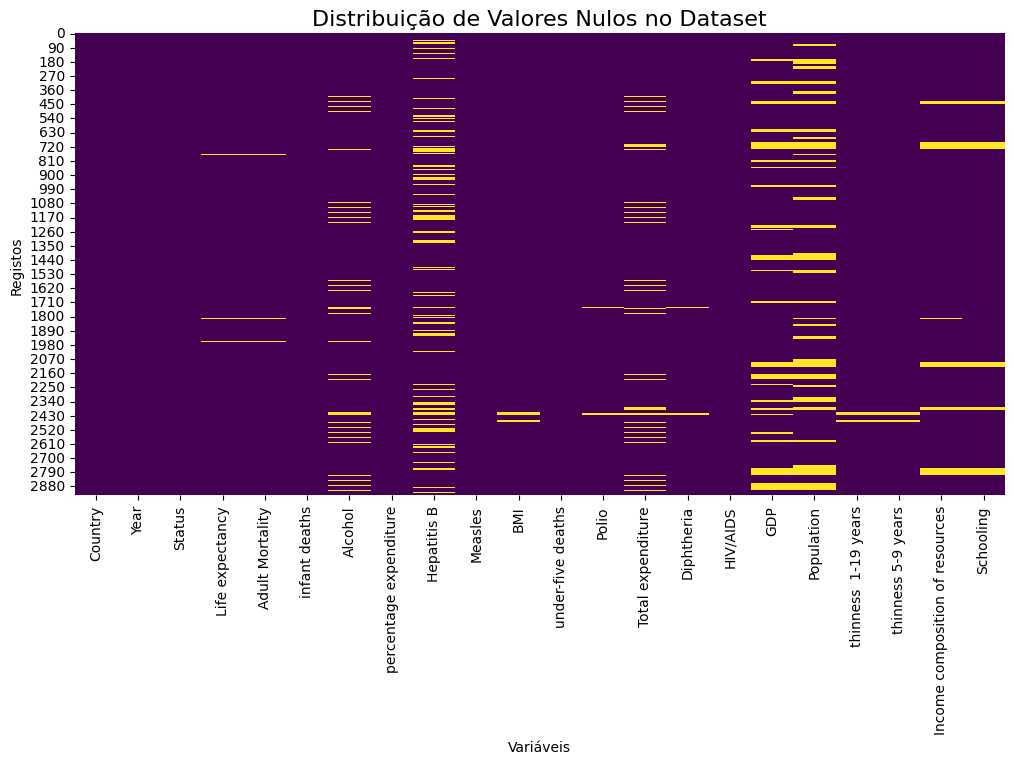

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
# Visualizar a distribuição dos valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis')
plt.title("Distribuição de Valores Nulos no Dataset", fontsize=16)
plt.xlabel("Variáveis")
plt.ylabel("Registos")
plt.show()

df_original.isnull().sum()

In [9]:
# Remover todas as linhas com valores nulos
df_cleaned = df_original.dropna()

# Exibir informações sobre o dataset após a remoção de nulos
missing_values_after_cleaning = df_cleaned.isnull().sum()
shape_after_cleaning = df_cleaned.shape

missing_values_after_cleaning, shape_after_cleaning



(Country                            0
 Year                               0
 Status                             0
 Life expectancy                    0
 Adult Mortality                    0
 infant deaths                      0
 Alcohol                            0
 percentage expenditure             0
 Hepatitis B                        0
 Measles                            0
 BMI                                0
 under-five deaths                  0
 Polio                              0
 Total expenditure                  0
 Diphtheria                         0
 HIV/AIDS                           0
 GDP                                0
 Population                         0
 thinness  1-19 years               0
 thinness 5-9 years                 0
 Income composition of resources    0
 Schooling                          0
 dtype: int64,
 (1649, 22))

Os dados foram limpos e todas as linhas com valores nulos foram removidas. Aqui estão as observações:

Não existe mais valores nulos no dataset.

O dataset original tinha 2.938 registos e 22 colunas.

Após a remoção, registamos 1.649 entradas.

In [12]:
# Função para selecionar colunas específicas e eliminar as demais
def filter_columns(df, columns_to_keep):
    """
    Filtra um DataFrame para manter apenas as colunas especificadas.

    :param df: DataFrame original
    :param columns_to_keep: Lista de colunas a serem mantidas
    :return: DataFrame filtrado
    """
    return df[columns_to_keep]

# Lista de colunas a manter
columns_to_keep = [
    "Life expectancy",
    "percentage expenditure",
    "Hepatitis B",
    "Polio",
    "Total expenditure",
    "Diphtheria",
    "GDP",
    "Income composition of resources",
    "Schooling"
]

# Aplicar a função ao DataFrame original
df_selected = filter_columns(df_original, columns_to_keep)




---
# 2.5 - Análise exploratória/estatististica do Dataset

1. Estatísticas descritivas: Resumo estatístico para variáveis numéricas.
2. Distribuição das variáveis: Identificação de padrões ou possíveis outliers.
3. Correlação entre variáveis: Análise da relação entre elas, para detectar redundâncias ou dependências.


In [ ]:
# Função para categorizar as variáveis de um DataFrame
def analyze_variable_types(df):
    variable_types = {
        "binary": [],  # Variáveis binárias (0 ou 1)
        "categorical": [],  # Variáveis categóricas (discretas)
        "continuous": [],  # Variáveis contínuas (numéricas)
    }

    # Analisar cada coluna no DataFrame
    for column in df.columns:
        unique_values = df[column].dropna().unique()  # Eliminar valores nulos

        if set(unique_values).issubset({0, 1, 0.0, 1.0}):
            variable_types["binary"].append(column)
        elif df[column].dtype in ["int64", "float64"] and len(unique_values) > 3:
            variable_types["continuous"].append(column)
        else:
            variable_types["categorical"].append(column)

    # Output do número de variáveis por tipo
    print(f"\nNúmero de variáveis binárias: {len(variable_types['binary'])}")
    print(f"Número de variáveis categóricas: {len(variable_types['categorical'])}")
    print(f"Número de variáveis contínuas: {len(variable_types['continuous'])}")

    return variable_types


# Aplicar a função ao conjunto de dados
variable_types = analyze_variable_types(df_original)

# Exibir os tipos de variáveis
print("\nVariáveis Binárias:")
print(variable_types["binary"])
print("\nVariáveis Categóricas:")
print(variable_types["categorical"])
print("\nVariáveis Contínuas:")
print(variable_types["continuous"])



Número de variáveis binárias: 0
Número de variáveis categóricas: 2
Número de variáveis contínuas: 20

Variáveis Binárias:
[]

Variáveis Categóricas:
['Country', 'Status']

Variáveis Contínuas:
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
# Transformar a variável 'Status' em valores numéricos (1 e 2)
df_original['Status'] = df_original['Status'].map({'Developed': 1, 'Developing': 2})

# Gerar IDs sequenciais para substituir "Country"
df_original['Country'] = df_original['Country'].astype('category').cat.codes + 1  # Adicionar 1 para começar em 1, não em 0

# Confirmar que os IDs são sequenciais
df_original['Country'].unique()



array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  45,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int16  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 2.6 - Associação

In [ ]:
quantiles1 = five_quantile_based_bins(df_original['Year'])
quantiles2= five_quantile_based_bins(df_original['Life expectancy'])
quantiles3 = five_quantile_based_bins(df_original['Adult Mortality'])
quantiles4 = five_quantile_based_bins(df_original['infant deaths'])
quantiles5 = five_quantile_based_bins(df_original['Alcohol'])
quantiles6 = five_quantile_based_bins(df_original['percentage expenditure'])
quantiles7 = five_quantile_based_bins(df_original['Hepatitis B'])
quantiles8 = five_quantile_based_bins(df_original['Measles'])
quantiles9 = five_quantile_based_bins(df_original['BMI'])
quantiles10 = five_quantile_based_bins(df_original['under-five deaths'])
quantiles11 = five_quantile_based_bins(df_original['Polio'])
quantiles12 = five_quantile_based_bins(df_original['Total expenditure'])
quantiles13 = five_quantile_based_bins(df_original['Diphtheria'])
quantiles14 = five_quantile_based_bins(df_original['HIV/AIDS'])
quantiles15 = five_quantile_based_bins(df_original['GDP'])
quantiles16 = five_quantile_based_bins(df_original['Population'])
quantiles17 = five_quantile_based_bins(df_original['thinness  1-19 years'])
quantiles18 = five_quantile_based_bins(df_original['thinness 5-9 years'])
quantiles19 = five_quantile_based_bins(df_original['Income composition of resources'])
quantiles20 = five_quantile_based_bins(df_original['Schooling'])


c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecate

In [ ]:
rules, supp_dict = ar.create_association_rules(df_original, max_cols=2, binning_method=five_quantile_based_bins)
rules

c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attached_series = binned_series.append(na_series).reindex(series.index)
c:\Users\avlal\anaconda3\envs\MTAD\lib\site-packages\arules\utils\binning.py:88: FutureWarning: The series.append method is deprecate

Calculating all relevant supports
100%|██████████| 253/253 [00:00<00:00, 1152.43it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 462/462 [00:00<00:00, 706.79it/s]
Overall # of Rules:  8804


,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'BMI': 'Unknown'},{'thinness 1-19 years': 'Unknown'},BMI=Unknown ==> thinness 1-19 years=Unknown,34,34,34,0.011572,0.011572,0.011572,1.0000,86.4118,2938
1,{'BMI': 'Unknown'},{'thinness 5-9 years': 'Unknown'},BMI=Unknown ==> thinness 5-9 years=Unknown,34,34,34,0.011572,0.011572,0.011572,1.0000,86.4118,2938
2,{'thinness 1-19 years': 'Unknown'},{'BMI': 'Unknown'},thinness 1-19 years=Unknown ==> BMI=Unknown,34,34,34,0.011572,0.011572,0.011572,1.0000,86.4118,2938
3,{'thinness 1-19 years': 'Unknown'},{'thinness 5-9 years': 'Unknown'},thinness 1-19 years=Unknown ==> thinness 5-9 ...,34,34,34,0.011572,0.011572,0.011572,1.0000,86.4118,2938
4,{'thinness 5-9 years': 'Unknown'},{'BMI': 'Unknown'},thinness 5-9 years=Unknown ==> BMI=Unknown,34,34,34,0.011572,0.011572,0.011572,1.0000,86.4118,2938
...,...,...,...,...,...,...,...,...,...,...,...,...
8799,{'under-five deaths': '0'},{'thinness 1-19 years': '(8.0 - 28.0]'},under-five deaths=0 ==> thinness 1-19 years=(...,785,576,30,0.267189,0.196052,0.010211,0.0382,0.1949,2938
8800,{'GDP': '(3279.0 - 8514.0]'},{'percentage expenditure': '[0.0 - 34.0]'},GDP=(3279.0 - 8514.0] ==> percentage expenditu...,498,1175,38,0.169503,0.399932,0.012934,0.0763,0.1908,2938
8801,{'percentage expenditure': '[0.0 - 34.0]'},{'GDP': '(3279.0 - 8514.0]'},percentage expenditure=[0.0 - 34.0] ==> GDP=(3...,1175,498,38,0.399932,0.169503,0.012934,0.0323,0.1908,2938
8802,{'GDP': '(8514.0 - 119173.0]'},{'percentage expenditure': '[0.0 - 34.0]'},GDP=(8514.0 - 119173.0] ==> percentage expendi...,498,1175,36,0.169503,0.399932,0.012253,0.0723,0.1808,2938


# 2.7 - Exportaçao dos dados para ML


In [ ]:
# Exportar o dataset limpo para um ficheiro CSV
data_treino = './data/Life_Expectancy_Clean.csv'
df_original.to_csv(data_treino, index=False)

data_treino


'./data/Life_Expectancy_Clean.csv'